In [4]:
%%capture

from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open('cleaned.html') as f:
    html = f.read().replace("<br>", '\n')
    dfList = pd.read_html(html)
    if len(dfList) != 1:
        print("Did not get exactly one table.")
    df = dfList[0]

In [6]:
df.head()

,Contributor,Amt,Contr. Date,Recipient,Report,Sched,Office,Dist
0,1199 SEIU POLITICAL ACTION FUND 330 WEST 42ND ...,10000.0,01-OCT-09,CYRUS VANCE FOR MANHATTAN DISTRICT ATTORNEY,2009 11 Pre General,C,District Attorney,NaN
1,212 MANAGEMENT GROUP LLC 357 WEST BROADWAY NEW...,500.0,23-JUN-10,CYRUS VANCE FOR MANHATTAN DISTRICT ATTORNEY,2010 July Periodic,C,District Attorney,NaN
2,"51 MERCER, LLC 51 MERCER ST NEW YORK, NY 10013",500.0,15-MAY-09,CYRUS VANCE FOR MANHATTAN DISTRICT ATTORNEY,2009 July Periodic,C,District Attorney,NaN
3,92ND REALTY LLC 1200 UNION TURNPIKE NEW HYDE P...,5000.0,16-SEP-09,CYRUS VANCE FOR MANHATTAN DISTRICT ATTORNEY,2009 10 Post Primary,C,District Attorney,NaN
4,"ABILENE, INC. PO BOX 240607 BROOKLYN, NY 11224",500.0,29-MAY-13,CYRUS VANCE FOR MANHATTAN DISTRICT ATTORNEY,2013 July Periodic,B,District Attorney,NaN


In [19]:
contributions = defaultdict(int)

for _, cont in df.iterrows():
    contributions[ cont['Contributor'] ] += cont['Amt']
    
contributions.pop('Total Contributions:', None)

6239702.73

In [ ]:
sortedConts = sorted(contributions.items(), key=lambda v: v[1], reverse=True)
topConts = sortedConts[1:100]

In [ ]:
def drawConts(conts):
    indices = np.arange(len(conts))

    width = 1
    bottom = None    
    plt.figure(figsize=(20, 20))
    plt.bar(indices, [cont[1] for cont in conts], width, color='#d62728', edgecolor='black')
    plt.xticks(ticks=indices, labels=[cont[0] for cont in conts], rotation='vertical')
    plt.title("Top 100 contributors without Vance himself (who donated 200,100)")
    plt.grid();
    
drawConts(topConts)

In [17]:
contributions = defaultdict(int)

for _, cont in df.iterrows():
    if cont['Contributor'] == 'Total Contributions:':
        continue
    date = str(cont['Contr. Date']).split('-')
    if int(date[-1]) < 15:
        continue
    contributions[ cont['Contributor'] ] += cont['Amt']
sortedConts = sorted(contributions.items(), key=lambda v: v[1], reverse=True)
topConts = sortedConts[:100]

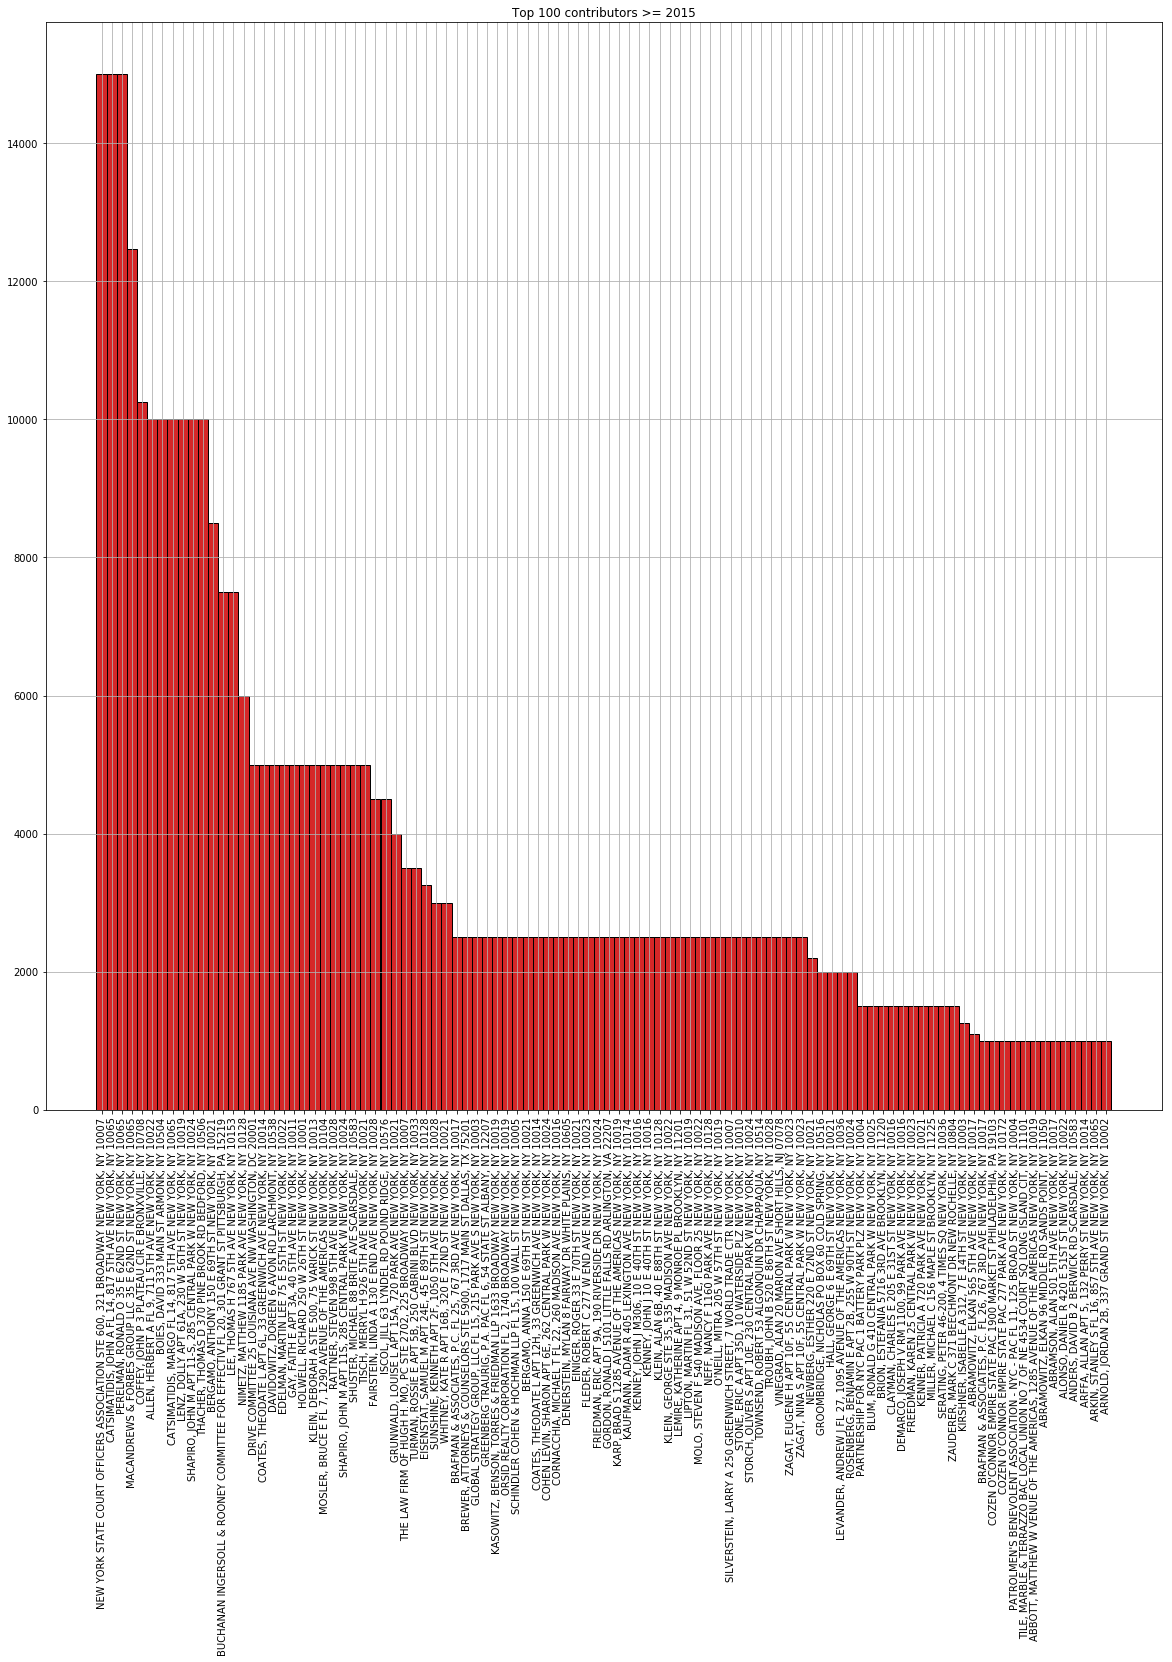

In [18]:
conts = topConts

indices = np.arange(len(conts))

width = 1
plt.figure(figsize=(20, 20))
plt.bar(indices, [cont[1] for cont in conts], width, color='#d62728', edgecolor='black')
plt.xticks(ticks=indices, labels=[cont[0] for cont in conts], rotation='vertical')
plt.title("Top 100 contributors >= 2015")
plt.grid()